#### This project aims to extract the features of tweets and analyze the opinion of tweets as positive, negative or neutral.

Questionnaires and surveys are no longer sufficient to know the opinions of people in the presence of big data, so I now use sentiment analysis, In the sense of analyzing people's feelings and perspectives through what they write and in particular, I want to know the people's Sentiment and emotions in the pandemic Covid -19.

Input: Textual content of a tweet

Output: Label signifying if the sentiment of the tweet is positive/negative

The provided dataset (COVID19 Tweets) consists of 179108 tweets (179108 rows √ó 13 columns). The dataset can be found at Kaggle

# Importing the necessary libraries:

In [78]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# download all the bells & whistles of nltk library
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('wordnet')


# Read COVID-19 Tweet .csv file 

In [79]:
# Load data
df = pd.read_csv('/Users/taifalwafii/Downloads/covid19_tweets.csv')
# Take a look at the first few rows
df.head()

user_name         user_location  \
0           ·èâ·é•‚òª’¨ÍÇÖœÆ            astroworld   
1    Tom Basile üá∫üá∏          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  üñäÔ∏èOfficial Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

# Exploratory data analysis

In [80]:
#check shape of data 
df.shape

(179108, 13)

In [81]:
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [82]:
#descriptive statistics summary
df.describe()

user_followers   user_friends  user_favourites
count    1.791080e+05  179108.000000     1.791080e+05
mean     1.090555e+05    2121.701566     1.444411e+04
std      8.414670e+05    9162.553072     4.452270e+04
min      0.000000e+00       0.000000     0.000000e+00
25%      1.720000e+02     148.000000     2.060000e+02
50%      9.920000e+02     542.000000     1.791000e+03
75%      5.284000e+03    1725.250000     9.388000e+03
max      4.944256e+07  497363.000000     2.047197e+06

In [83]:
# check missing values
df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [84]:
print('Total tweets in this data: {}'.format(df.shape[0]))
print('Total Unique Users in this data: {}'.format(df['user_name'].nunique()))
print('Total Unique location in this data: {}'.format(df['user_location'].nunique()))
print('Total Unique hashtags in this data: {}'.format(df['hashtags'].nunique()))

Total tweets in this data: 179108
Total Unique Users in this data: 92276
Total Unique location in this data: 26920
Total Unique hashtags in this data: 52640


In [85]:
# check first tweet
print(df['text'][0])

If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that‚Ä¶ https://t.co/QZvYbrOgb0


In [86]:
# check hashtags unique values
df['hashtags'].unique()

array([nan, "['COVID19']", "['CoronaVirusUpdates', 'COVID19']", ...,
       "['COVID19', 'coronavirus', 'TrumpVirus']",
       "['COVID19', 'CloseTheSchools', 'KeepTheSchoolsClosed', 'KeepTeachersAlive', 'K12']",
       "['nurses', 'COVID19', 'coronavirus', 'schools']"], dtype=object)

In [87]:
# check user_location unique values
df['user_location'].unique()

array(['astroworld', 'New York, NY', 'Pewee Valley, KY', ...,
       'Newton, NJ', 'T.O.', 'Aliwal North, South Africa'], dtype=object)

In [88]:
def plot_chart(feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(15,5))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweets '.format(feature))
    plt.ylabel('Frequency')
    plt.xlabel(title)
    plt.xticks(rotation=90)
    plt.show()
    

looking here plot , we find that 2.09% of users are from India

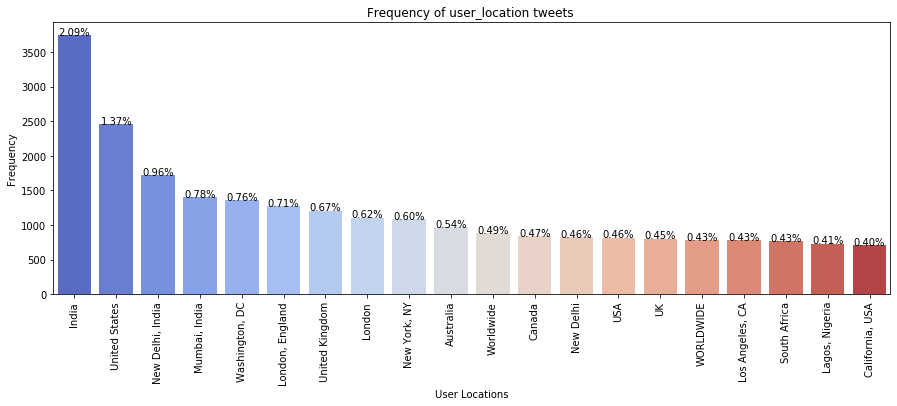

In [89]:
plot_chart('user_location', 'User Locations', 'coolwarm')

looking here plot , we find that 21.10% of users write in #COVID19 hashtags

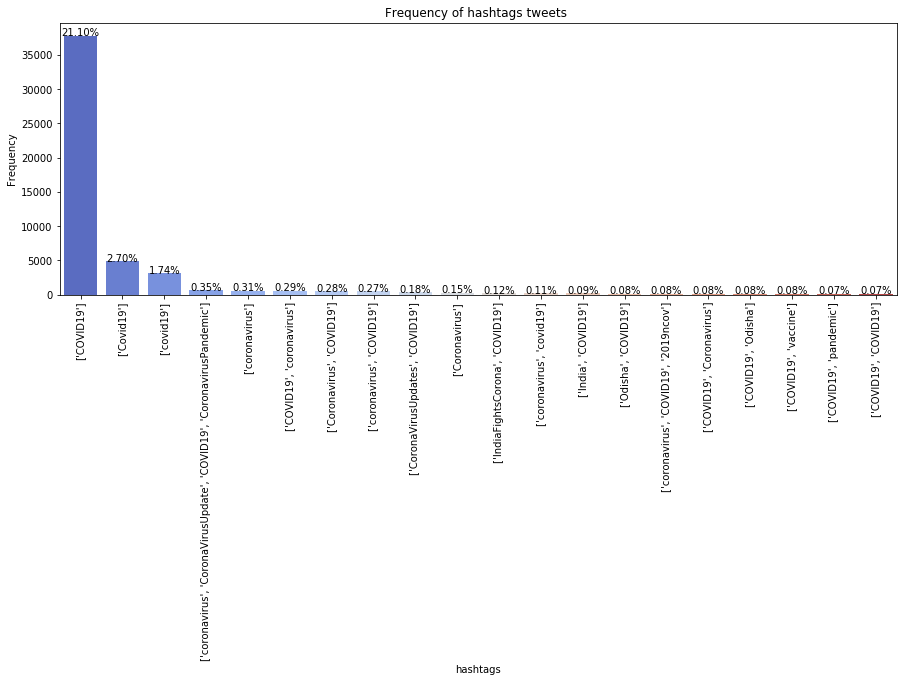

In [90]:
plot_chart('hashtags', 'hashtags', 'coolwarm')

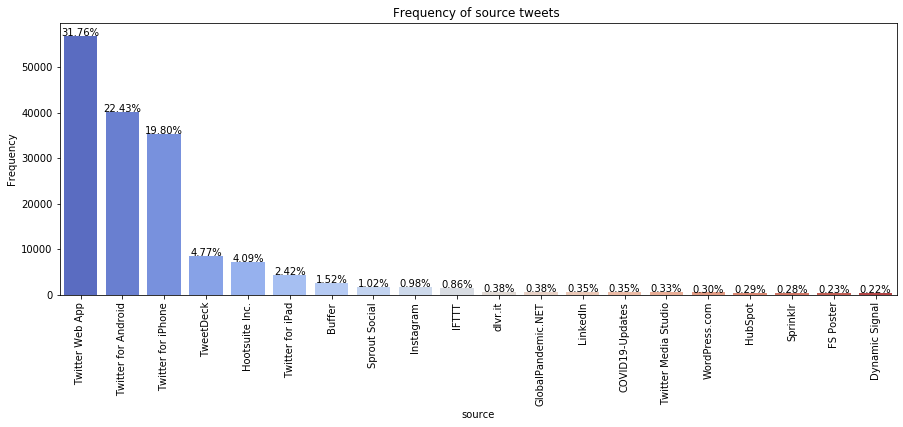

In [91]:
plot_chart('source', 'source', 'coolwarm')

In the below output cell , The heatmap of dataframe shows correlations between `user_favourites` and `user_followers`

In [92]:
# View the correlations
df.corr()

user_followers  user_friends  user_favourites  user_verified  \
user_followers         1.000000     -0.003580        -0.029218       0.320957   
user_friends          -0.003580      1.000000         0.201050       0.012829   
user_favourites       -0.029218      0.201050         1.000000      -0.061141   
user_verified          0.320957      0.012829        -0.061141       1.000000   
is_retweet                  NaN           NaN              NaN            NaN   

                 is_retweet  
user_followers          NaN  
user_friends            NaN  
user_favourites         NaN  
user_verified           NaN  
is_retweet              NaN

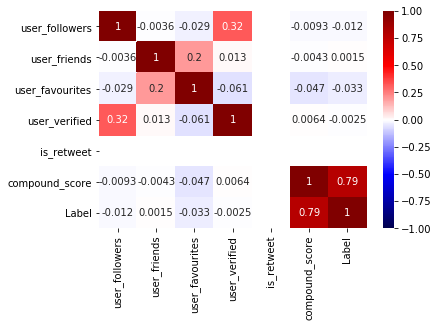

In [117]:
#corr matrix
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

#**Data Preprocessing**
### preprocess text using some NLP tchniques like:

- Converting to lowercase 
- Remove text in square brackets,
- Remove links,
- Remove punctuation
- Remove words containing numbers
- Removing stopwords
- Lemmatization

In [94]:
lemmatizer = WordNetLemmatizer()

In [95]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #???
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')] 
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [96]:
df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

user_name         user_location  \
0           ·èâ·é•‚òª’¨ÍÇÖœÆ            astroworld   
1    Tom Basile üá∫üá∏          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  üñäÔ∏èOfficial Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  smelled scent hand sanitizers today someone pa...   
1  2020-07-25 12:27:17  hey yankee yankeespr mlb wouldnt made sense pl...   
2  2020-07-25 12:27:14  wdunlap realdonaldtrump trump never claimed ho...   
3  2020-07-25 12:27:10  brookbanktv one gift give appreciation simple ...   
4  2020-07-25 12:27:08  july medium bulletin novel coronavirusupdates ...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [97]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [98]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

# **Sentiment Anlaysis for Tweets**

In [102]:
sent = SentimentIntensityAnalyzer()

In [103]:
def check_sentiment(x):
    return sent.polarity_scores(x)['compound']

In [104]:
df['compound_score'] = df['text'].apply(lambda x: check_sentiment(x))

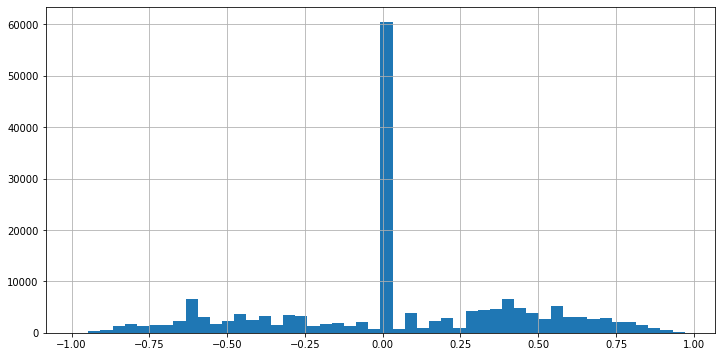

In [105]:
df['compound_score'].hist(bins=50, figsize=(12,6))

In [106]:
def generate_label(x):
    return 1 if x>0 else 0

In [107]:
df['Label'] = df['compound_score'].apply(lambda x: generate_label(x))

In [111]:
df.head()

user_name         user_location  \
0           ·èâ·é•‚òª’¨ÍÇÖœÆ            astroworld   
1    Tom Basile üá∫üá∏          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  üñäÔ∏èOfficial Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  smelled scent hand sanitizers today someone pa...   
1  2020-07-25 12:27:17  hey yankee yankeespr mlb wouldnt made sense pl...   
2  2020-07-25 12:27:14  wdunlap realdonaldtrump trump never claimed ho...   
3  2020-07-25 12:27:10  brookbanktv one gift give appreciation simple ...   
4  2020-07-25 12:27:08  july medium bulletin novel coronavirusupdates ...   

                            hashtags               source  is_retweet  \
0                                NaN   Twitter for iPhone       False   
1                                NaN  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   

   compound_score  Label  
0          0.4939      1  
1          0.4019      1  
2          0.2057      1  
3          0.7351      1  
4          0.3182      1

Object `pie` not found.


In [115]:
Fig = px.pie(
    df,
    names='Label',
    title='Sentiment Chart',
    #color_discrete_sequence=px.colors.sequential.Agsunset
)
Fig.show()

## **Model**

In [71]:
x_train , x_test , y_train , y_test = train_test_split(df.text , df.Label , test_size = 0.2 , random_state = 0 )
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (143286,)
y_train shape :  (143286,)
x_test shape :  (35822,)
y_test shape :  (35822,)


In [72]:
cv = TfidfVectorizer()

In [73]:
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)
x_train.toarray().shape

(143286, 121625)

In [63]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
C = [100, 10, 1.0, 0.1, 0.01, 0.001]


/Users/taifalwafii/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
# define grid search
grid = dict(solver=solvers, penalty=penalty, C=C)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)

grid_result = grid_search.fit(x_train, y_train)


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     21948
           1       0.90      0.90      0.90     13874

    accuracy                           0.92     35822
   macro avg       0.92      0.92      0.92     35822
weighted avg       0.92      0.92      0.92     35822

